In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("pepper_data.csv", sep=',')

In [31]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
df.head()

,link,title,category,hottness,number_of_comments,price_after_discount,price_before_discount,percentage_change_in_price,place_of_bargain_price
0,https://www.pepper.pl/promocje/polaryzowane-ok...,Polaryzowane okulary przeciwsłoneczne outdooro...,"['Home', 'Moda', 'Akcesoria modowe', 'Okulary ...",210,31,20zł,-1,-1,Amazon.pl
1,https://www.pepper.pl/promocje/rower-gravel-kr...,Rower gravel Kross Esker 6.0 PW rozm. L,"['Home', 'Sport i turystyka', 'Sporty rowerowe...",249,20,5.999zł,7.499zł,-20%,place_of_bargain_price_not_available
2,https://www.pepper.pl/promocje/koszulki-pier-o...,Koszulki Pier One 5-pack T-shirt basic,"['Home', 'Moda', 'Odzież', 'Koszulki']",222,21,76zł,109zł,-30%,Zalando
3,https://www.pepper.pl/kupony/amazonde-rabat-5-...,"Amazon DE, FR rabat 5 euro na zakupy MWZ 15 euro","['Home', 'Dom i mieszkanie', 'Przybory kuchenn...",260,11,-1,-1,-1,Amazon.de
4,https://www.pepper.pl/promocje/oscyloskop-fnir...,Oscyloskop FNIRSI DSO-TC3 @ Banggood,"['Home', 'Ogród i majsterkowanie']",221,24,"171,23zł",209zł,-18%,Banggood


In [6]:
df.dtypes

link                          object
title                         object
category                      object
hottness                       int64
number_of_comments             int64
price_after_discount          object
price_before_discount         object
percentage_change_in_price    object
place_of_bargain_price        object
dtype: object

In [7]:
df['price_before_discount'] = df['price_before_discount'].astype(str)
df['price_after_discount'] = df['price_after_discount'].astype(str)
# Replace 'ZA DARMO' with 0
df['price_before_discount'] = df['price_before_discount'].replace('ZA DARMO', '0')
df['price_after_discount'] = df['price_after_discount'].replace('ZA DARMO', '0')
# Replace '-1' with np.NaN
df['price_before_discount'] = df['price_before_discount'].replace('-1', np.NaN)
df['price_after_discount'] = df['price_after_discount'].replace('-1', np.NaN)
# Remove 'zł' and '.' and convert column to numeric
df['price_before_discount'] = df['price_before_discount'].str.replace('zł', '').str.replace('.', '').str.replace(',', '.').astype(float)
df['price_after_discount'] = df['price_after_discount'].str.replace('zł', '').str.replace('.', '').str.replace(',', '.').astype(float)

C:\Users\jzmuj\AppData\Local\Temp\ipykernel_7640\1961896064.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price_before_discount'] = df['price_before_discount'].str.replace('zł', '').str.replace('.', '').str.replace(',', '.').astype(float)
C:\Users\jzmuj\AppData\Local\Temp\ipykernel_7640\1961896064.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price_after_discount'] = df['price_after_discount'].str.replace('zł', '').str.replace('.', '').str.replace(',', '.').astype(float)


In [8]:
df['percentage_change_in_price'] = df['percentage_change_in_price'].astype(str)
# Replace '-1' with np.NaN
df['percentage_change_in_price'] = df['percentage_change_in_price'].replace('-1', np.NaN)
# Remove '%' and '-' and convert column to numeric
df['percentage_change_in_price'] = df['percentage_change_in_price'].str.replace('%', '').str.replace('-', '').astype(float)
df['percentage_change_in_price'] = df['percentage_change_in_price']/100

In [9]:
df.head()

,link,title,category,hottness,number_of_comments,price_after_discount,price_before_discount,percentage_change_in_price,place_of_bargain_price
0,https://www.pepper.pl/promocje/polaryzowane-ok...,Polaryzowane okulary przeciwsłoneczne outdooro...,"['Home', 'Moda', 'Akcesoria modowe', 'Okulary ...",210,31,20.00,NaN,NaN,Amazon.pl
1,https://www.pepper.pl/promocje/rower-gravel-kr...,Rower gravel Kross Esker 6.0 PW rozm. L,"['Home', 'Sport i turystyka', 'Sporty rowerowe...",249,20,5999.00,7499.0,0.20,place_of_bargain_price_not_available
2,https://www.pepper.pl/promocje/koszulki-pier-o...,Koszulki Pier One 5-pack T-shirt basic,"['Home', 'Moda', 'Odzież', 'Koszulki']",222,21,76.00,109.0,0.30,Zalando
3,https://www.pepper.pl/kupony/amazonde-rabat-5-...,"Amazon DE, FR rabat 5 euro na zakupy MWZ 15 euro","['Home', 'Dom i mieszkanie', 'Przybory kuchenn...",260,11,NaN,NaN,NaN,Amazon.de
4,https://www.pepper.pl/promocje/oscyloskop-fnir...,Oscyloskop FNIRSI DSO-TC3 @ Banggood,"['Home', 'Ogród i majsterkowanie']",221,24,171.23,209.0,0.18,Banggood


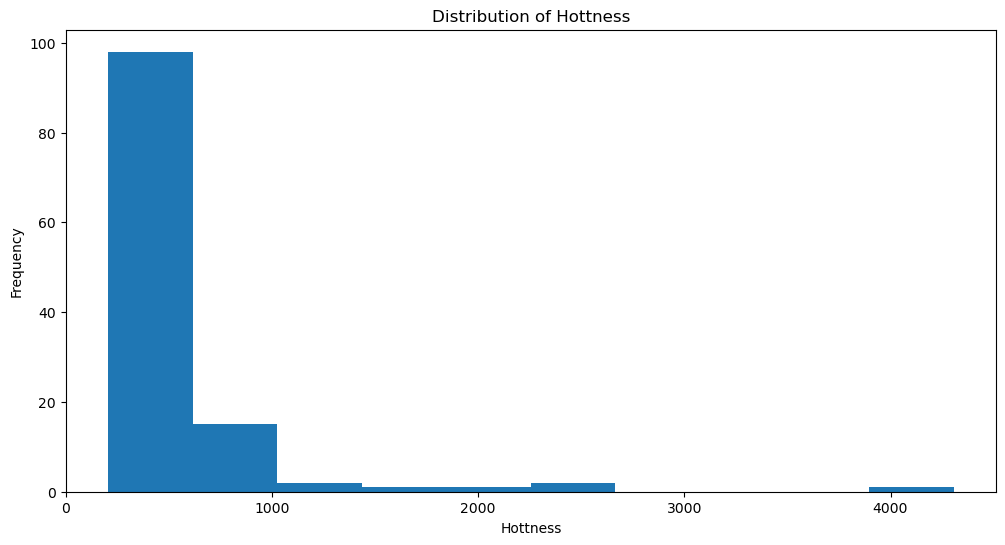

In [10]:
# Distribution of hottness
plt.figure(figsize=(12, 6))
plt.hist(df['hottness'], bins=10)
plt.xlabel('Hottness')
plt.ylabel('Frequency')
plt.title('Distribution of Hottness')
plt.show()

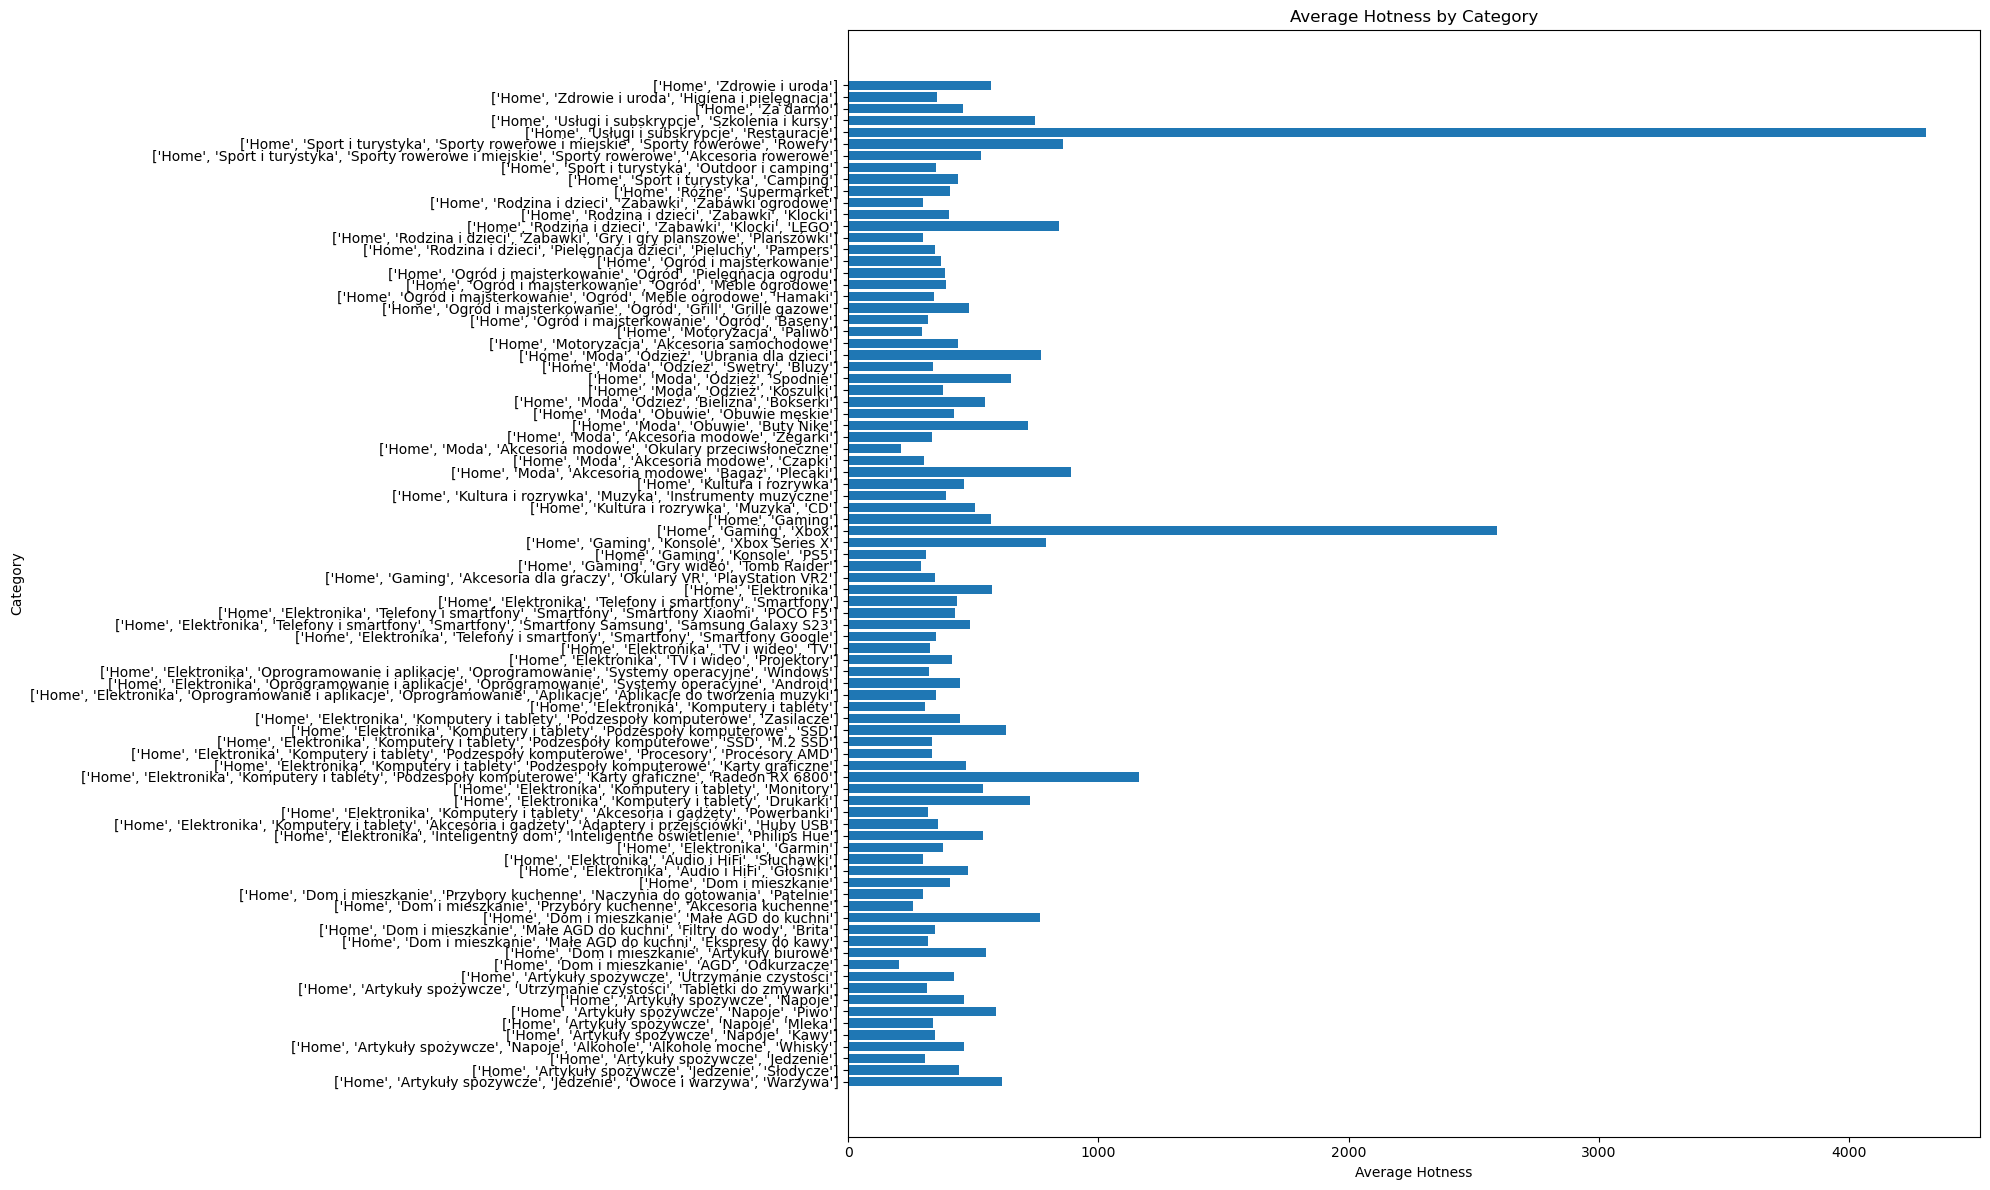

In [11]:
# Hotness Analysis
average_hotness_by_category = df.groupby('category')['hottness'].mean()
plt.figure(figsize=(20, 12))
plt.barh(average_hotness_by_category.index, average_hotness_by_category.values)
plt.xlabel('Average Hotness')
plt.ylabel('Category')
plt.title('Average Hotness by Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

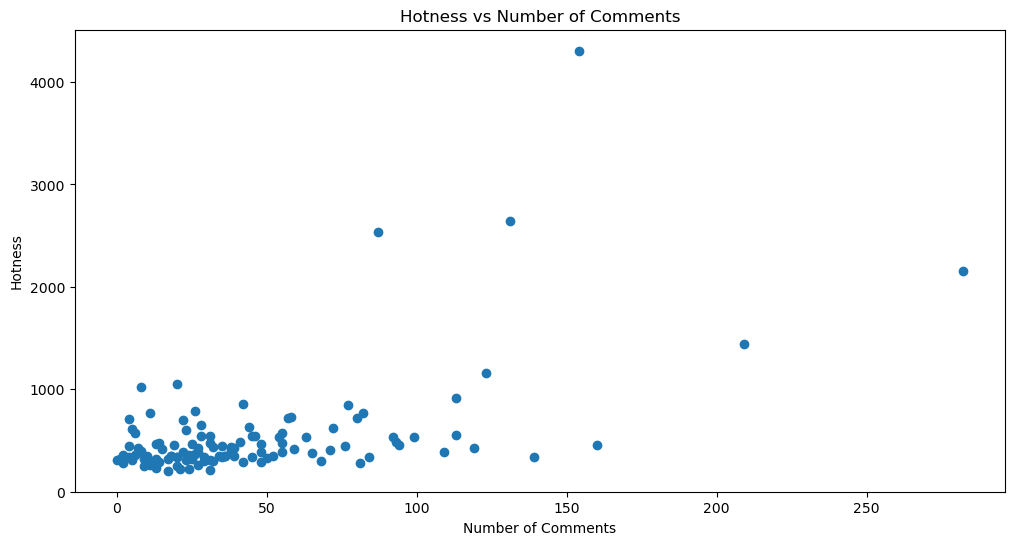

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(df['number_of_comments'], df['hottness'])
plt.xlabel('Number of Comments')
plt.ylabel('Hotness')
plt.title('Hotness vs Number of Comments')
plt.show()

In [13]:
# Number of comments analysis
top_commented_deals = df.nlargest(5, 'number_of_comments')
print("Top 5 commented deals:")
print(top_commented_deals[['title', 'number_of_comments']])

Top 5 commented deals:
                                         title  number_of_comments
119         Rower MTB R-RAYMON HardRay 4.0 Nin                 282
88      Plecak The North Face BOREALIS CLASSIC                 209
37       GAZ LINDE DO NABICIA BUTLI SODASTREAM                 160
71               Pyszne lunch -20 zł MWZ 45 zł                 154
62   Team Group M.2 SSD 1TB M.2 PCIe NVMe MP33                 139


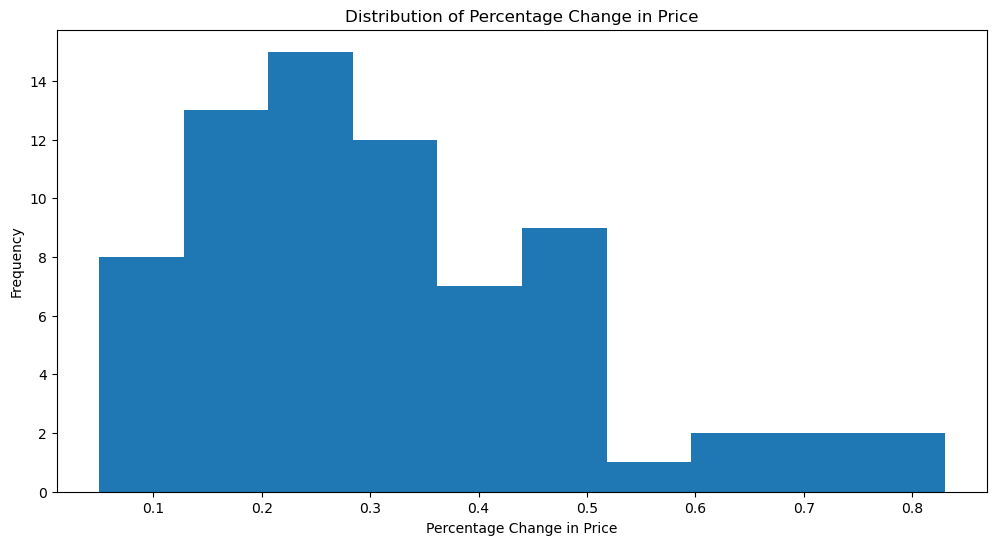

In [14]:
# Percentage Change in Price Analysis
plt.figure(figsize=(12, 6))
plt.hist(df['percentage_change_in_price'].dropna(), bins=10)
plt.xlabel('Percentage Change in Price')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Change in Price')
plt.show()

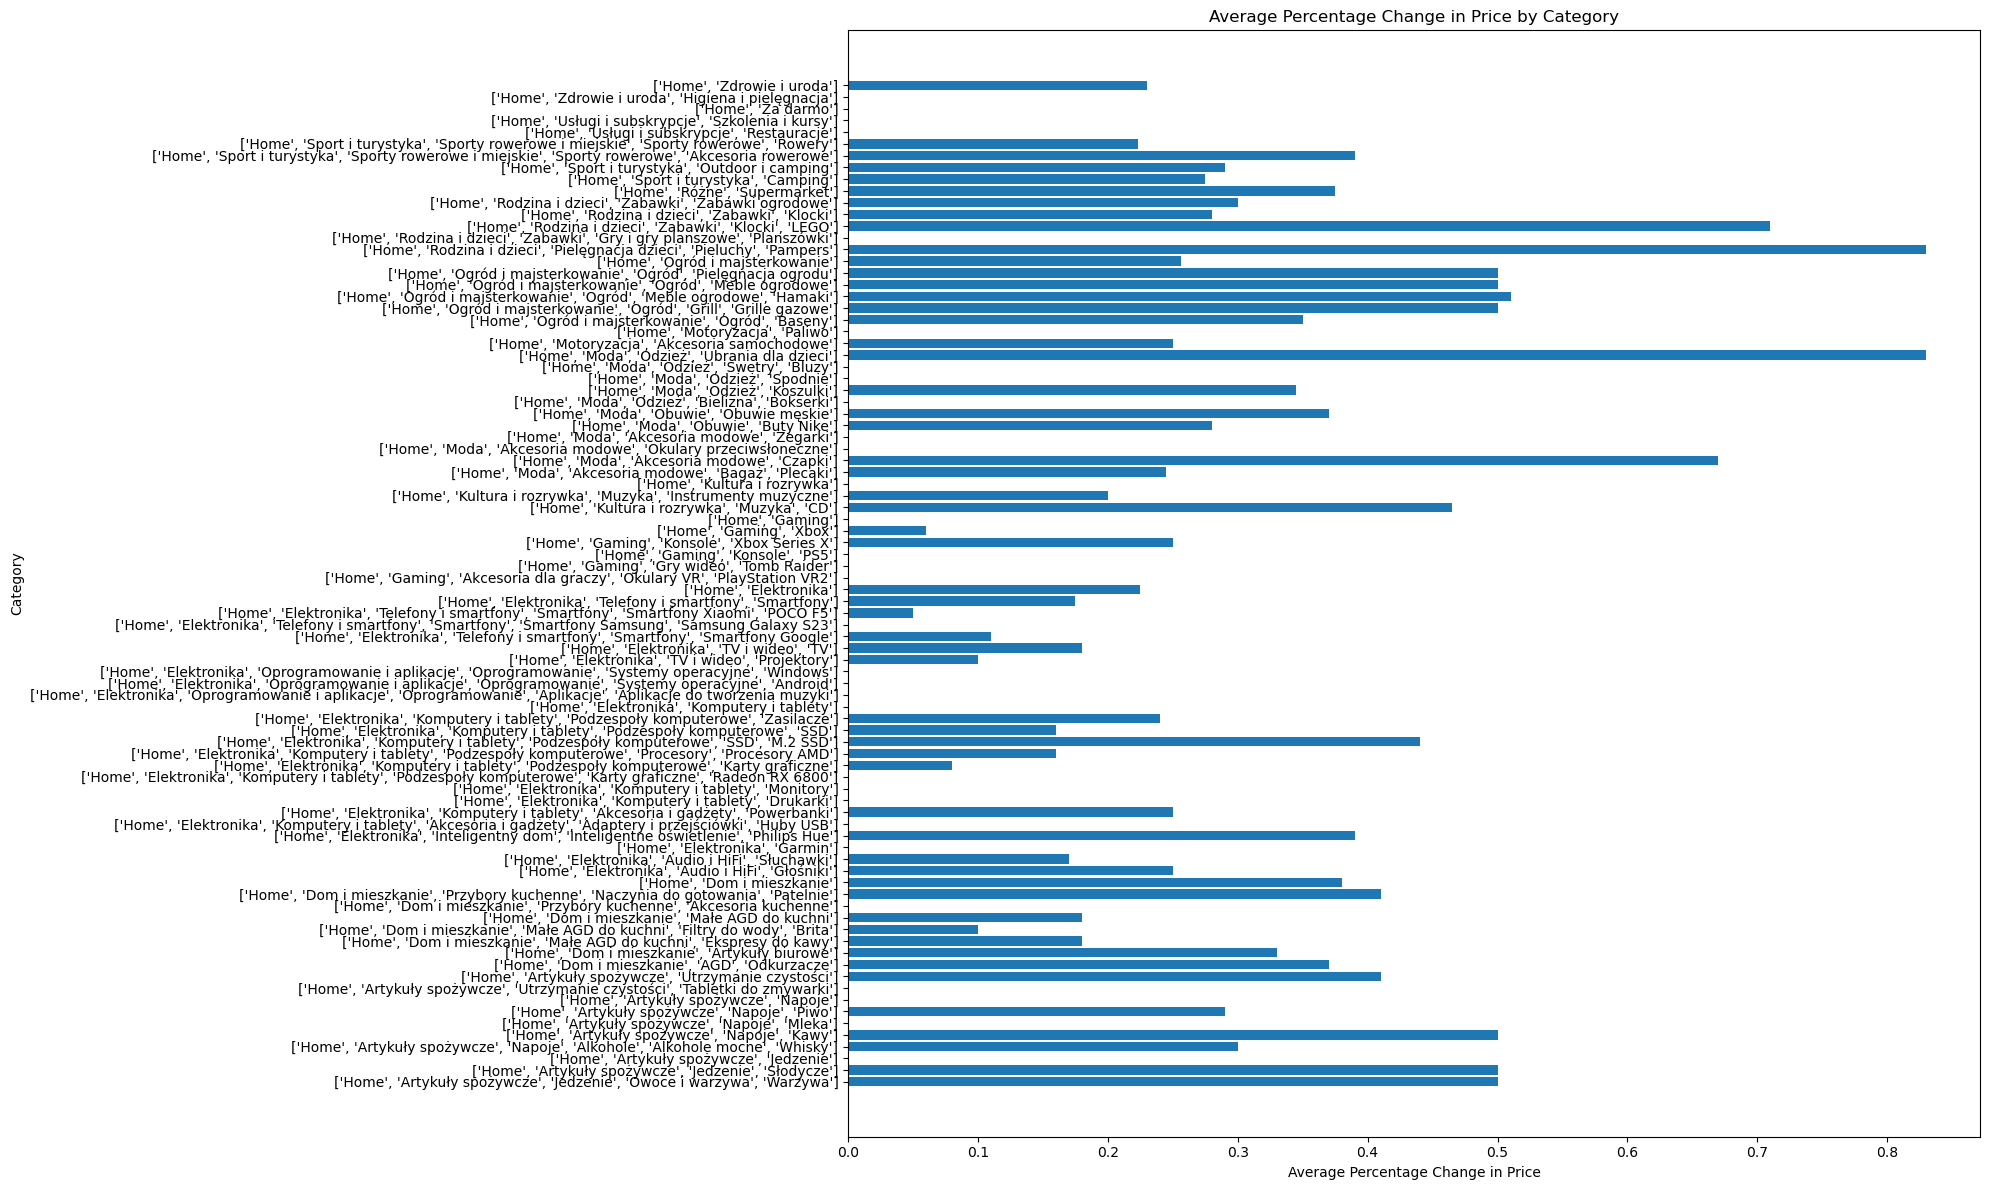

In [15]:
# Average Percentage Change Analysis
average_percentage_change_by_category = df.groupby('category')['percentage_change_in_price'].mean()
plt.figure(figsize=(20, 12))
plt.barh(average_percentage_change_by_category.index, average_percentage_change_by_category.values)
plt.xlabel('Average Percentage Change in Price')
plt.ylabel('Category')
plt.title('Average Percentage Change in Price by Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

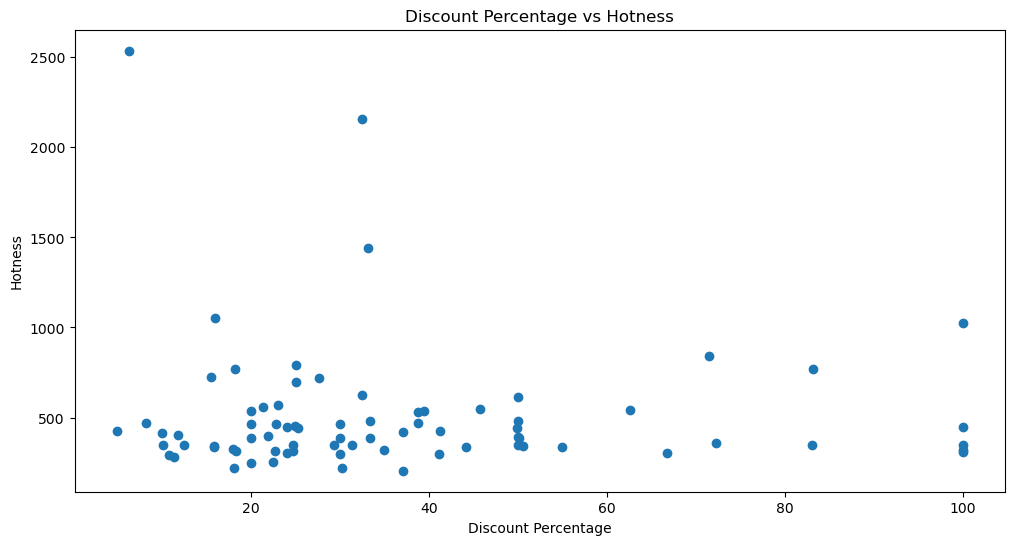

In [16]:
# Discount effectiveness analysis
df['discount'] = df['price_before_discount'] - df['price_after_discount']
df['discount_percentage'] = (df['discount'] / df['price_before_discount']) * 100

plt.figure(figsize=(12, 6))
plt.scatter(df['discount_percentage'], df['hottness'])
plt.xlabel('Discount Percentage')
plt.ylabel('Hotness')
plt.title('Discount Percentage vs Hotness')
plt.show()

In [17]:
# Category analysis
category_counts = df['category'].value_counts()
print("Top 5 most common categories:")
print(category_counts.head(5))

average_price_by_category = df.groupby('category')['price_after_discount'].mean()
print("Average price by category:")
print(average_price_by_category)

Top 5 most common categories:
['Home', 'Sport i turystyka', 'Sporty rowerowe i miejskie', 'Sporty rowerowe', 'Rowery']    4
['Home', 'Dom i mieszkanie']                                                                3
['Home', 'Moda', 'Odzież', 'Koszulki']                                                      3
['Home', 'Elektronika', 'Komputery i tablety', 'Podzespoły komputerowe', 'SSD']             3
['Home', 'Ogród i majsterkowanie']                                                          3
Name: category, dtype: int64
Average price by category:
category
['Home', 'Artykuły spożywcze', 'Jedzenie', 'Owoce i warzywa', 'Warzywa']             3.99
['Home', 'Artykuły spożywcze', 'Jedzenie', 'Słodycze']                               2.25
['Home', 'Artykuły spożywcze', 'Jedzenie']                                           1.99
['Home', 'Artykuły spożywcze', 'Napoje', 'Alkohole', 'Alkohole mocne', 'Whisky']    57.99
['Home', 'Artykuły spożywcze', 'Napoje', 'Kawy']                           

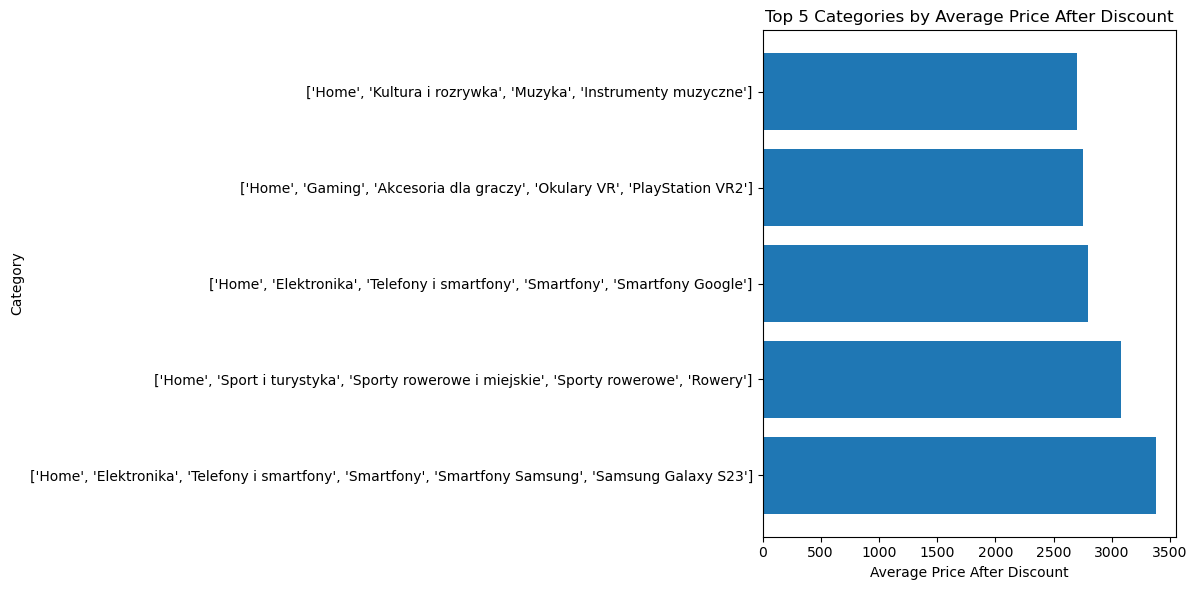

In [18]:
# Top 5 Categories by Average Price After Discount
top_categories_price = average_price_by_category.nlargest(5)
plt.figure(figsize=(12, 6))
plt.barh(top_categories_price.index, top_categories_price.values)
plt.xlabel('Average Price After Discount')
plt.ylabel('Category')
plt.title('Top 5 Categories by Average Price After Discount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

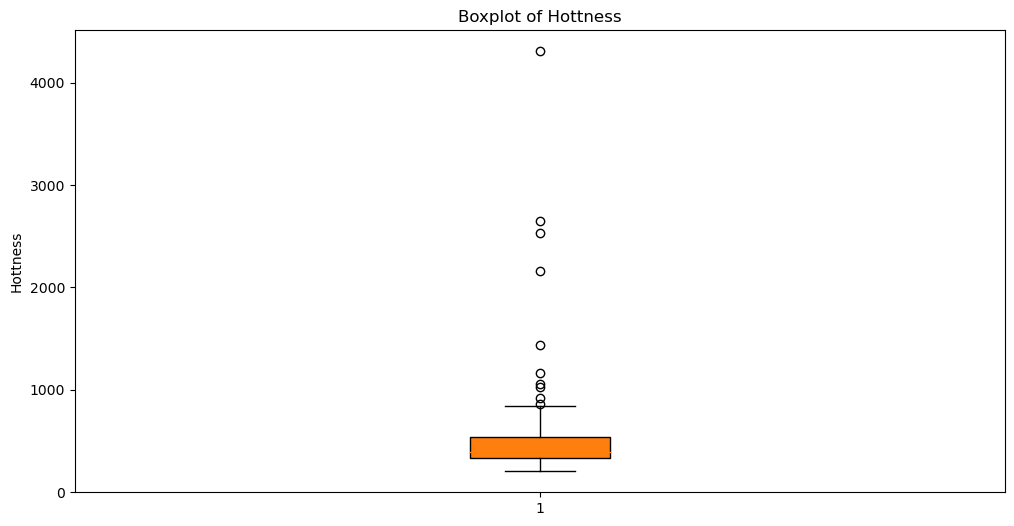

Deal with highest hottness:
                            title  hottness
71  Pyszne lunch -20 zł MWZ 45 zł      4306
Deal with lowest hottness:
                                                title  hottness
53  Odkurzacz workowy Daewoo DWC212 (700 W, 3 litr...       205


In [19]:
# Hotness analysis
boxplot_color = '#ff7f0e'
plt.figure(figsize=(12, 6))
plt.boxplot(df['hottness'], patch_artist=True, boxprops=dict(facecolor=boxplot_color))
plt.ylabel('Hottness')
plt.title('Boxplot of Hottness')
plt.show()

highest_hotness_deal = df.nlargest(1, 'hottness')
lowest_hotness_deal = df.nsmallest(1, 'hottness')

print("Deal with highest hottness:")
print(highest_hotness_deal[['title', 'hottness']])

print("Deal with lowest hottness:")
print(lowest_hotness_deal[['title', 'hottness']])

In [27]:
df.head()

,link,title,category,hottness,number_of_comments,price_after_discount,price_before_discount,percentage_change_in_price,place_of_bargain_price
0,https://www.pepper.pl/promocje/polaryzowane-ok...,Polaryzowane okulary przeciwsłoneczne outdooro...,"['Home', 'Moda', 'Akcesoria modowe', 'Okulary ...",210,31,20zł,-1,-1,Amazon.pl
1,https://www.pepper.pl/promocje/rower-gravel-kr...,Rower gravel Kross Esker 6.0 PW rozm. L,"['Home', 'Sport i turystyka', 'Sporty rowerowe...",249,20,5.999zł,7.499zł,-20%,place_of_bargain_price_not_available
2,https://www.pepper.pl/promocje/koszulki-pier-o...,Koszulki Pier One 5-pack T-shirt basic,"['Home', 'Moda', 'Odzież', 'Koszulki']",222,21,76zł,109zł,-30%,Zalando
3,https://www.pepper.pl/kupony/amazonde-rabat-5-...,"Amazon DE, FR rabat 5 euro na zakupy MWZ 15 euro","['Home', 'Dom i mieszkanie', 'Przybory kuchenn...",260,11,-1,-1,-1,Amazon.de
4,https://www.pepper.pl/promocje/oscyloskop-fnir...,Oscyloskop FNIRSI DSO-TC3 @ Banggood,"['Home', 'Ogród i majsterkowanie']",221,24,"171,23zł",209zł,-18%,Banggood


In [32]:
import ast
df['category'] = df['category'].apply(ast.literal_eval)

def expand_categories(row):
    categories_ = row['category']
    for i, category in enumerate(categories_):
        row[f'category_{i+1}'] = category
    return row

# apply the function to each row
categories = df.apply(expand_categories, axis=1)

<AxesSubplot:>

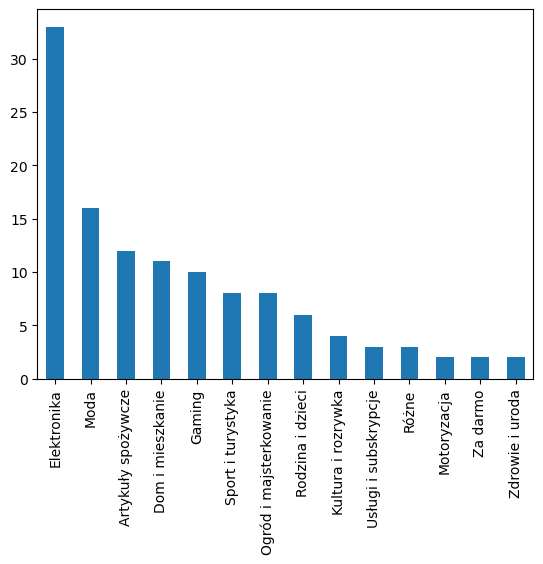

In [39]:
categories.category_2.value_counts().plot.bar()

<AxesSubplot:>

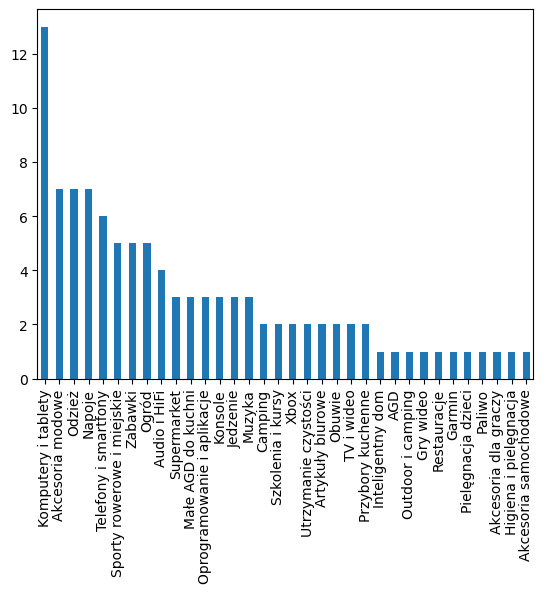

In [40]:
categories.category_3.value_counts().plot.bar()

<AxesSubplot:>

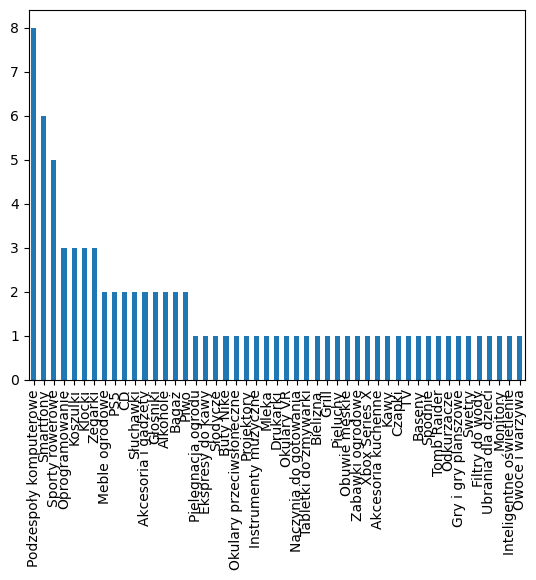

In [41]:
categories.category_4.value_counts().plot.bar()

<AxesSubplot:>

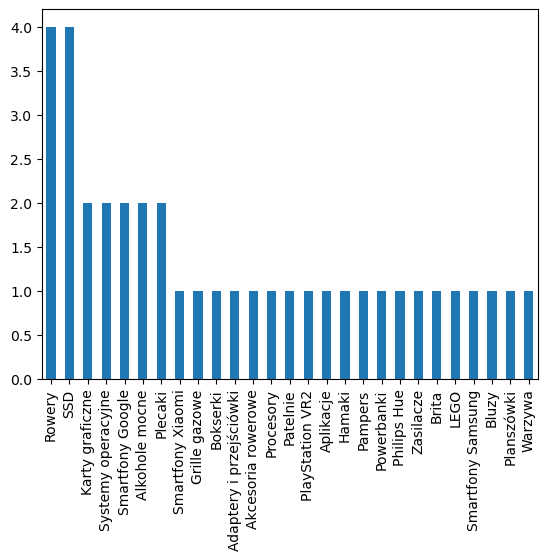

In [42]:
categories.category_5.value_counts().plot.bar()

<AxesSubplot:>

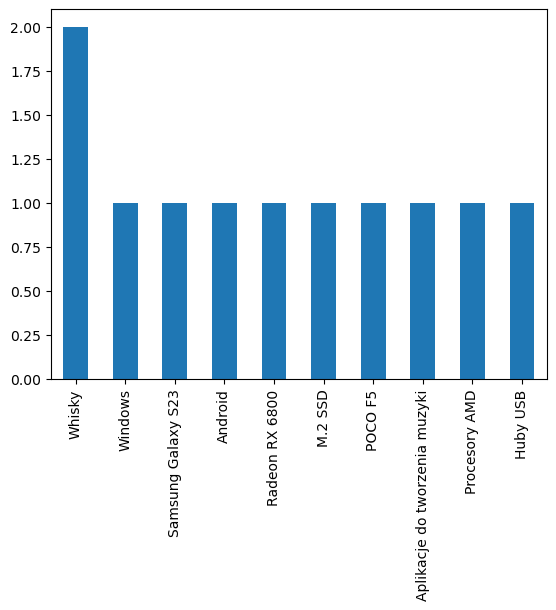

In [43]:
categories.category_6.value_counts().plot.bar()